In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

import scipy as sp
import scipy.integrate as integrate
import scipy.special as special


# lengths
l_ab = 1.25
l_bc = 1.25
l_de = 1.75
l_ef = 1.5
l_fg = 0.25
l_gh = 0.25

# masses of arms
m_ab = 100
m_bc = 100
m_de = 50
m_ef = 50

# masses of electronics
m_d = 200
m_e = 200
m_f = 100
m_f = 100

In [ ]:
class StaticSystem:
    L: any

    F1: any
    F2: any

    n1: any
    n2: any

    def __init__(self, title, start, stop):
        self.title = title
        self.L = np.linspace(stop, start, 1000)
        self.F1 = np.zeros_like(self.L, dtype=np.float64)
        self.F2 = np.zeros_like(self.L, dtype=np.float64)
        self.n1 = np.zeros_like(self.L, dtype=np.float64)
        self.n2 = np.zeros_like(self.L, dtype=np.float64)

    def addLateralForceVector(self, position, force):
        self.F2[np.argmax(self.L < position)] = force

    def addLateralForceArea(self, start, stop, force):
        self.F1[(self.L >= start) & (self.L <= stop)] += force

    def addNormalForceVector(self, position, force):
        self.n2[np.argmax(self.L < position)] = force

    def addNormalForceArea(self, start, stop, force):
        self.n1[(self.L >= start) & (self.L <= stop)] += force

    def getQ(self):
        return np.cumsum(self.F1) * abs(self.L[1] - self.L[0]) + np.cumsum(self.F2)

    def getN(self):
        return np.cumsum(self.n1) * abs(self.L[1] - self.L[0]) + np.cumsum(self.n2)

    def getM(self):
        Q = self.getQ()
        return np.cumsum(Q) * abs(self.L[1] - self.L[0])

    def plot(self):
        plt.figure(figsize=(10, 12))

        plt.subplot(5, 1, 1)
        plt.title(self.title)

        plt.fill_between(self.L, self.F1, color='green', alpha=0.3)
        plt.plot(self.L, self.F2, "g")
        plt.ylabel("F [N/m or N]")

        plt.subplot(5, 1, 2)
        plt.plot(self.L, self.getQ(), "g")
        plt.ylabel("Q [N]")

        plt.subplot(5, 1, 3)
        plt.plot(self.L, self.getM(), "g")
        plt.ylabel("M [Nm]")

        # normalkräfte
        plt.subplot(5, 1, 4)
        plt.fill_between(self.L, self.n1, color='b', alpha=0.3)
        plt.plot(self.L, self.n2, "b")
        plt.ylabel("n [N/m or N]")

        plt.subplot(5, 1, 5)
        plt.plot(self.L, self.getN(), "b")
        plt.ylabel("N [N]")


        plt.xlabel("L [m]")

        #plt.tight_layout()
        plt.show()    

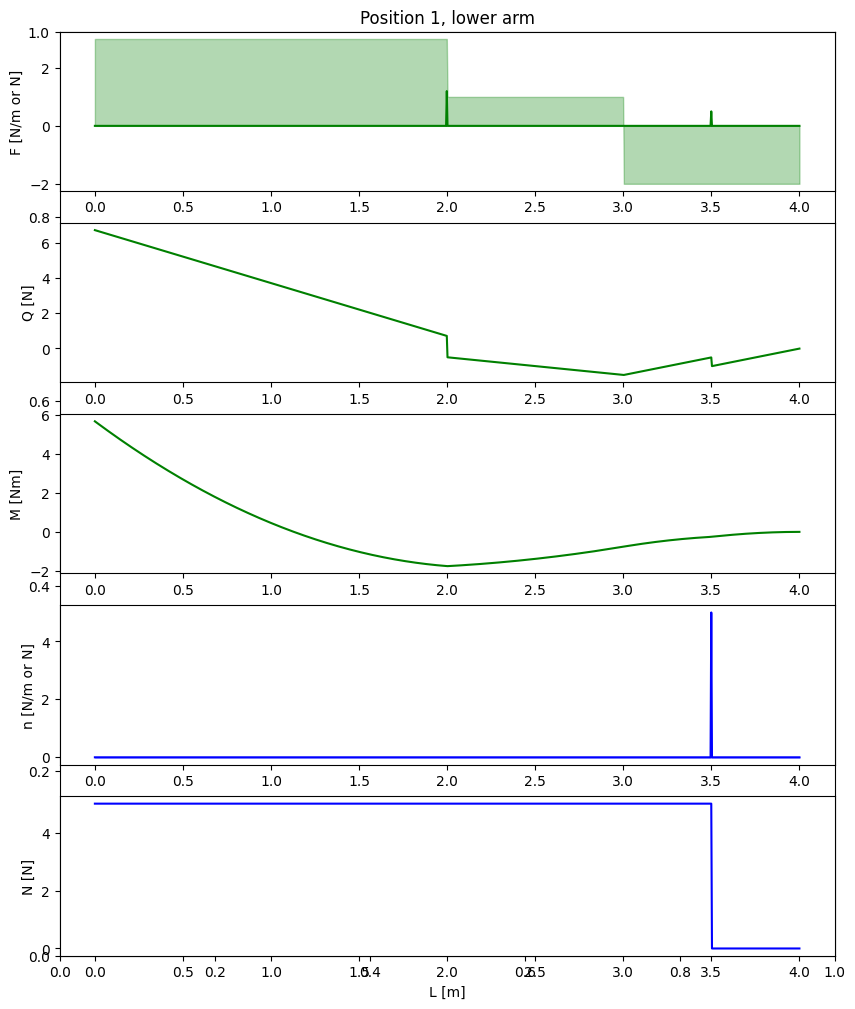

In [69]:
system1 = StaticSystem("Position 1, lower arm", 0, 4)

system1.addLateralForceArea(0, 3, 3)
system1.addLateralForceArea(2, 4, -2)

system1.addLateralForceVector(2, 1.2)
system1.addLateralForceVector(3.5, 0.5)

system1.addNormalForceVector(3.5, 5)


system1.plot()